# Student Data
This notebook analyzes pass/fail data for a class

In [74]:
data = [50,50,50,97,49,3,53,42,26,74,82,34,54,23,13,67,87,53,65,34,67,54]
print(data)

[50, 50, 50, 97, 49, 3, 53, 42, 26, 74, 82, 34, 54, 23, 13, 67, 87, 53, 65, 34, 67, 54]


In [75]:
import numpy as np


grades = np.array(data)
print(grades*2)

[100 100 100 194  98   6 106  84  52 148 164  68 108  46  26 134 174 106
 130  68 134 108]


In [76]:
grades.shape

(22,)

In [77]:
grades.mean()

51.22727272727273

In [78]:
study_hours = [10,11.5,9,16,9.25,1,11.5,9,8.5,14.5,15.5,13.75,9,8,15.5,8,9,6,10,12,12.5,12]

student_data = np.array([study_hours, grades])
student_data[0][1]

11.5

In [79]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print(f'Average Study Time; {avg_study}\nAverage Grade: {avg_grade}')

Average Study Time; 10.522727272727273
Average Grade: 51.22727272727273


In [80]:
import pandas as pd

df_students = pd.DataFrame({'Name':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V'],
                            'StudyHour':student_data[0],
                            'Grade':student_data[1]})
                        

In [81]:
passed = pd.Series(df_students.Grade >= 60)
df_students = pd.concat([df_students, passed.rename('Passed')], axis=1)

In [82]:
import wget

# link = 'https://sports-statistics.com/database/basketball-data/nba/michael-jordan-nba-career-regular-season-stats-by-game.csv'
# wget.download(url= link,out= "mj_stats.csv" )

#df_students.Grade = df_students.Grade.fillna(df_students.Grade.mean())

#df_students = df_students.fillna({'Grade': 0, {'StudyHour' : 0}})

False    15
True      7
Name: Passed, dtype: int64


C:\Users\chris\AppData\Local\Temp\ipykernel_24996\1121349001.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


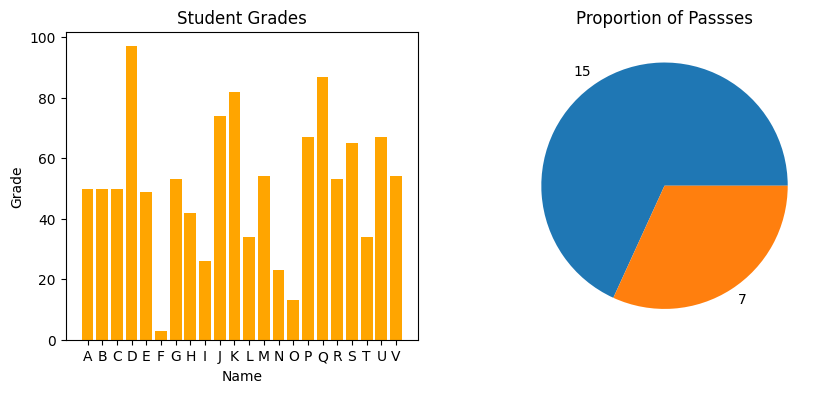

In [83]:
import matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].bar(x= df_students.Name, height= df_students.Grade, color= "orange")

ax[0].set_title('Student Grades')
ax[0].set_xlabel('Name')
ax[0].set_ylabel('Grade')

passes_count = df_students.Passed.value_counts()
print(passes_count)

ax[1].pie(passes_count, labels = passes_count)
ax[1].set_title('Proportion of Passses')

fig.show()

<Axes: xlabel='Name'>

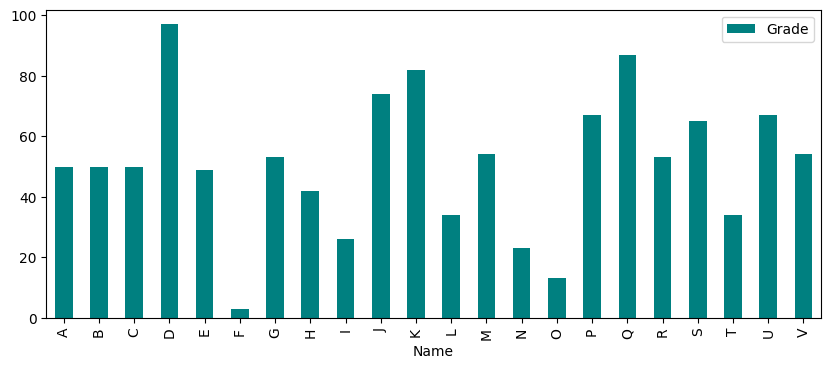

In [84]:
df_students.plot.bar(x='Name', y= 'Grade', figsize = (10,4), color = 'teal')

C:\Users\chris\AppData\Local\Temp\ipykernel_24996\3029270610.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


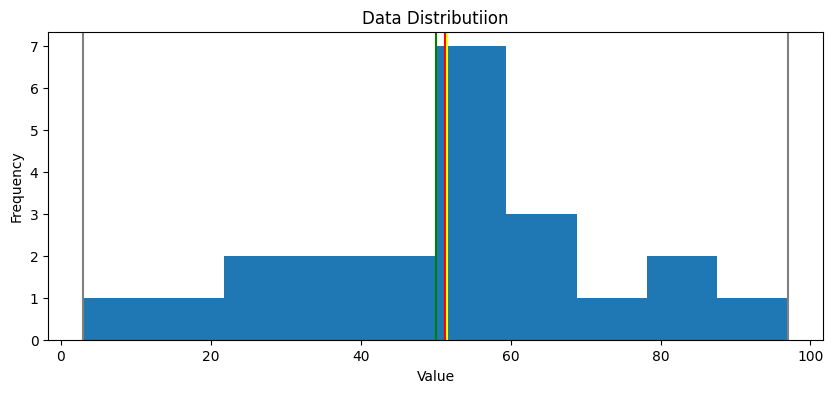

In [95]:
grades = df_students.Grade

min_val =df_students.Grade.min()
max_val =df_students.Grade.max()
mean_val =df_students.Grade.mean()
med_val =df_students.Grade.median()
mode_val =float(df_students.Grade.mode())

fig = plt.figure(figsize = (10,4))

plt.hist(grades)

plt.axvline(x=min_val, color = 'gray')
plt.axvline(x=max_val, color = 'gray')
plt.axvline(x=mean_val, color = 'red')
plt.axvline(x=med_val, color = 'yellow')
plt.axvline(x=mode_val, color = 'green')


plt.title('Data Distributiion')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_24996\366518060.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


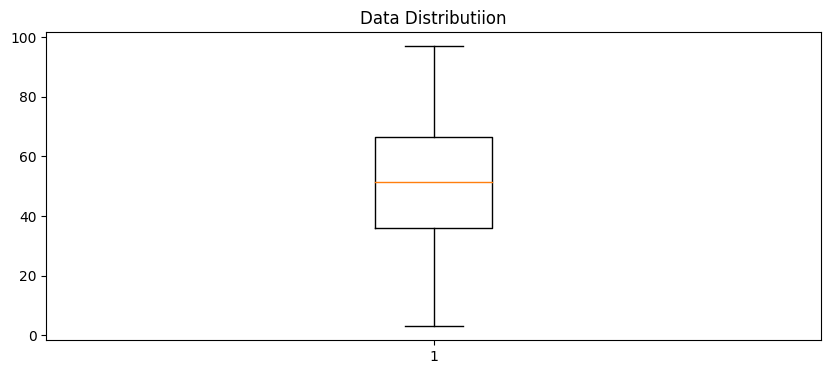

In [97]:
grades = df_students.Grade

fig = plt.figure(figsize = (10,4))

plt.boxplot(grades)

plt.title('Data Distributiion')


fig.show()

In [99]:
df_students.describe()

,StudyHour,Grade
count,22.000000,22.000000
mean,10.522727,51.227273
std,3.487144,23.358351
min,1.000000,3.000000
25%,9.000000,36.000000
50%,10.000000,51.500000
75%,12.375000,66.500000
max,16.000000,97.000000


In [101]:
df_sample = df_students[df_students.StudyHour >1]
df_sample

,Name,StudyHour,Grade,Passed
0,A,10.00,50.0,False
1,B,11.50,50.0,False
2,C,9.00,50.0,False
3,D,16.00,97.0,True
4,E,9.25,49.0,False
6,G,11.50,53.0,False
7,H,9.00,42.0,False
8,I,8.50,26.0,False
9,J,14.50,74.0,True
10,K,15.50,82.0,True


<Axes: title={'center': 'StudyHour'}, xlabel='Passed'>

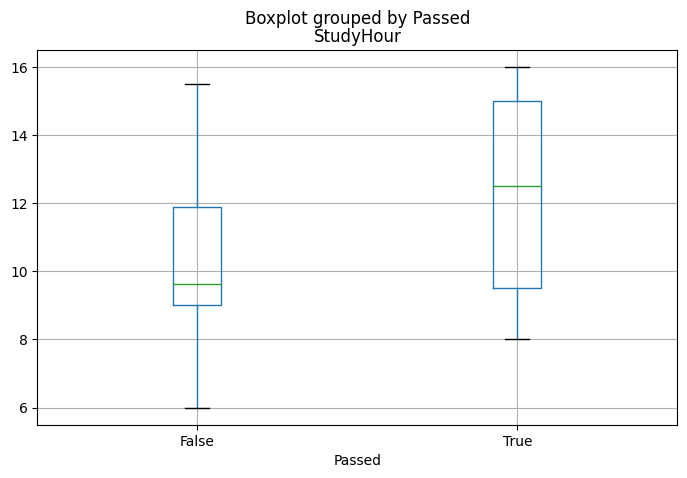

In [106]:
df_sample.boxplot(column= 'StudyHour', by = 'Passed', figsize=(8,5))


<Axes: xlabel='Name'>

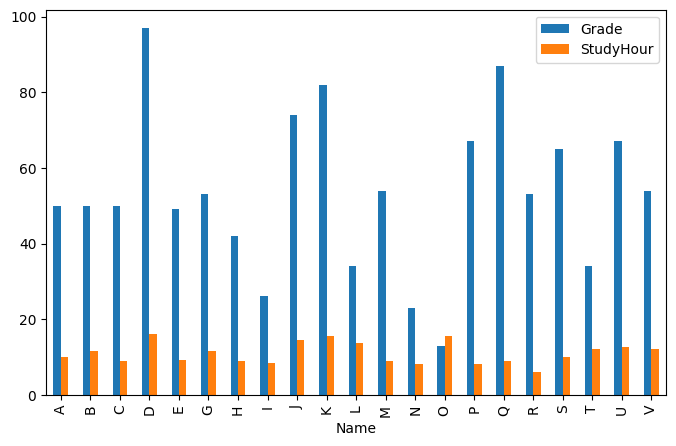

In [114]:
df_sample.plot(x = 'Name', y = ['Grade', 'StudyHour'], kind='bar',figsize=(8,5))

<Axes: xlabel='Name'>

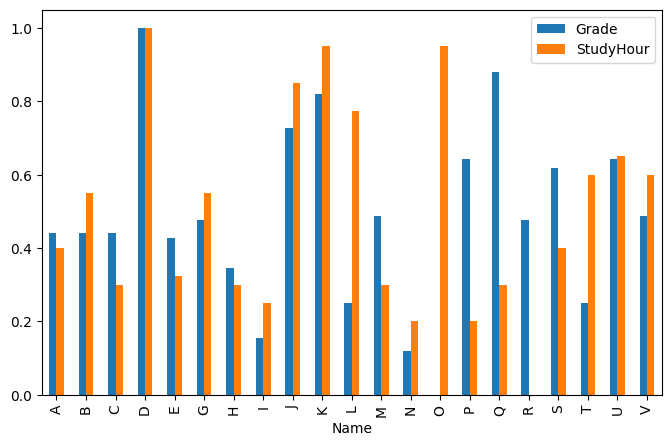

In [117]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHour']].copy()

df_normalized[['Grade', 'StudyHour']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHour']])

df_normalized.plot(x= 'Name', y= ['Grade', 'StudyHour'], kind='bar',figsize=(8,5))


In [119]:
df_normalized.Grade.corr(df_normalized.StudyHour)

0.2203332781028246

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHour', ylabel='Grade'>

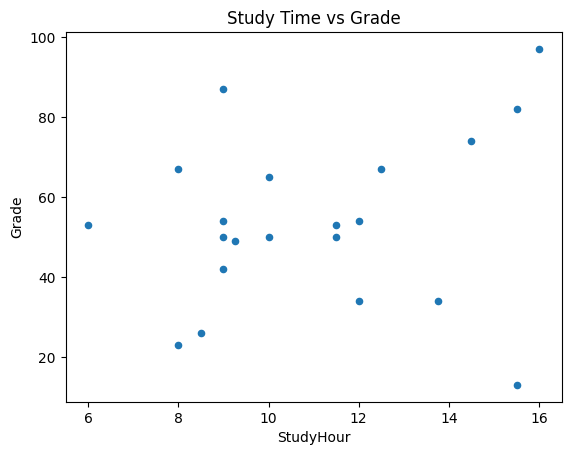

In [123]:
df_sample.plot(title= 'Study Time vs Grade', x= 'StudyHour', y= 'Grade', kind = 'scatter')

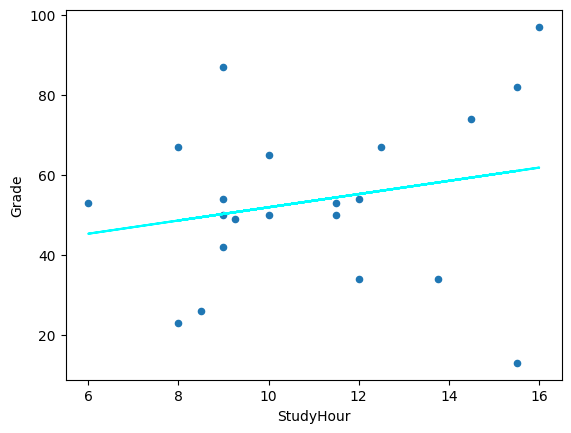

1.6525741434987566 35.384840948739836


In [136]:
#y = mx + b

#f(x)

#error = y - f(x)**2

import scipy
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHour']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHour'], df_regression['Grade'])

df_regression['fx'] = (m * df_regression['StudyHour']) + b

df_regression['error'] = df_regression['fx'] - df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='StudyHour', y='Grade')

plt.plot(df_regression['StudyHour'], df_regression['fx'], color = 'cyan')

plt.show()

print(m,b)

In [137]:
def predict(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

prediction = predict(14)

prediction

70.4712